# Search Engine Implementation


An implementation of a search engine to rank matching documents according to their relevance to a given search query. The ranking is calculated by using simple term frequency and document frequency measures.

Let's first import the librarys we will be using.

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

Make a list of all txt files in the path specified

In [2]:

path = 'ACL\\' # notice here that backward slash is replaced with double backward slashes

txtFiles = []
for fileName in os.listdir(path):
    if fileName.endswith('.txt'):
        txtFiles.append(path+fileName)
print(len(txtFiles),txtFiles[:5])

154 ['ACL\\A00-2036.pdf.txt', 'ACL\\A00-2037.pdf.txt', 'ACL\\A00-2038.pdf.txt', 'ACL\\A00-2039.pdf.txt', 'ACL\\A00-2040.pdf.txt']


Defining a function to take a document as an input and return a list of words in the input document

In [3]:
## function to read text and return list of words 
def wordList(doc):
    sList=[]
    for w in doc.split(" "):
        sList.append(w.strip('\n'))
    return sList

A sample text to the functions

In [4]:
sampleText="On July 16, 1969, the Apollo 11 spacecraft launched from the Kennedy Space Center in Florida. Its mission was to go\
where no human being had gone before—the moon! The crew consisted of Neil Armstrong, Michael Collins, and Buzz Aldrin. The\
spacecraft landed on the moon in the Sea of Tranquility, a basaltic flood plain, on 20--July 1969"

In [5]:
print(wordList(sampleText))

['On', 'July', '16,', '1969,', 'the', 'Apollo', '11', 'spacecraft', 'launched', 'from', 'the', 'Kennedy', 'Space', 'Center', 'in', 'Florida.', 'Its', 'mission', 'was', 'to', 'gowhere', 'no', 'human', 'being', 'had', 'gone', 'before—the', 'moon!', 'The', 'crew', 'consisted', 'of', 'Neil', 'Armstrong,', 'Michael', 'Collins,', 'and', 'Buzz', 'Aldrin.', 'Thespacecraft', 'landed', 'on', 'the', 'moon', 'in', 'the', 'Sea', 'of', 'Tranquility,', 'a', 'basaltic', 'flood', 'plain,', 'on', '20--July', '1969']


In [6]:
###  function to remove puntuation marks from words
# import string.maketrans as textfilter
from string import punctuation as puncs
def removePuncs(wordList):
    #print('punctuation marks are: ', puncs)
    sList = []
    for w in wordList:
        word=w.translate(str.maketrans({key: None for key in puncs}))
        sList.append(word)
    return sList

In [7]:
removePuncs(wordList(sampleText))

['On',
 'July',
 '16',
 '1969',
 'the',
 'Apollo',
 '11',
 'spacecraft',
 'launched',
 'from',
 'the',
 'Kennedy',
 'Space',
 'Center',
 'in',
 'Florida',
 'Its',
 'mission',
 'was',
 'to',
 'gowhere',
 'no',
 'human',
 'being',
 'had',
 'gone',
 'before—the',
 'moon',
 'The',
 'crew',
 'consisted',
 'of',
 'Neil',
 'Armstrong',
 'Michael',
 'Collins',
 'and',
 'Buzz',
 'Aldrin',
 'Thespacecraft',
 'landed',
 'on',
 'the',
 'moon',
 'in',
 'the',
 'Sea',
 'of',
 'Tranquility',
 'a',
 'basaltic',
 'flood',
 'plain',
 'on',
 '20July',
 '1969']

In [8]:
### function to calculate term frequency in the doc
def termFrequencyInDoc(wordList):
    termFrequency_dic={}
    for w in wordList:
        if w in termFrequency_dic.keys():
            termFrequency_dic[w]+=1
        else:
            termFrequency_dic[w]=1
    return termFrequency_dic

In [9]:
termFrequencyInDoc(removePuncs(wordList(sampleText)))

{'On': 1,
 'July': 1,
 '16': 1,
 '1969': 2,
 'the': 4,
 'Apollo': 1,
 '11': 1,
 'spacecraft': 1,
 'launched': 1,
 'from': 1,
 'Kennedy': 1,
 'Space': 1,
 'Center': 1,
 'in': 2,
 'Florida': 1,
 'Its': 1,
 'mission': 1,
 'was': 1,
 'to': 1,
 'gowhere': 1,
 'no': 1,
 'human': 1,
 'being': 1,
 'had': 1,
 'gone': 1,
 'before—the': 1,
 'moon': 2,
 'The': 1,
 'crew': 1,
 'consisted': 1,
 'of': 2,
 'Neil': 1,
 'Armstrong': 1,
 'Michael': 1,
 'Collins': 1,
 'and': 1,
 'Buzz': 1,
 'Aldrin': 1,
 'Thespacecraft': 1,
 'landed': 1,
 'on': 2,
 'Sea': 1,
 'Tranquility': 1,
 'a': 1,
 'basaltic': 1,
 'flood': 1,
 'plain': 1,
 '20July': 1}

In [10]:
## function to calculate word Document frequency
def wordDocFre(dicList):
    vocan={}
    for docDic in dicList:
        for w in docDic.keys():
            if w in vocan.keys():
                vocan[w]+=1
            else:
                vocan[w]=1
    return vocan

Calculate inverse document using IDF(w) = log [(M+1)/k]

In [11]:
## function takes dictionary returned from wordDocFre functions above and outputs inverse document frequency of each word.
def inverseDocFre(vocan,totalDocs):
    invDocFreqDic={}
    for key,value in vocan.items():
        invDocFreqDic[key] = math.log((totalDocs + 1)/value)
    return invDocFreqDic

In [12]:
### function to calculate tf-idf for everyword in doc
def tfidf(docList):
    dicList=[]
    for i in range(0,len(docList)):
        sList = wordList(open(docList[i]).read())
        sListWoPuncs = removePuncs(sList)
        dicList.append(termFrequencyInDoc(sListWoPuncs))        

    invDocFreqDic = inverseDocFre(wordDocFre(dicList),len(docList))
    tfidf_Dic = []
    for tfDic in dicList:
        tempDic = {}
        for key in tfDic.keys():
            tempDic[key] = tfDic[key] * invDocFreqDic[key]
        tfidf_Dic.append(tempDic)

    return tfidf_Dic, dicList  

#### sorting vocabulary according to IDF-against K (number of documents containing that word) values and plot using matplotlib.pyplot

<img src="files/images/IDFvsDF.png">

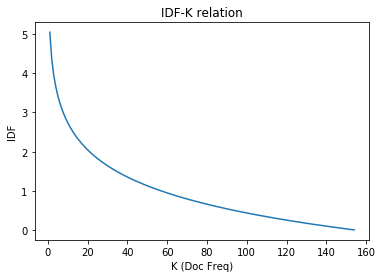

In [14]:
dicList=[]
for i in range(0,len(txtFiles)):
    sList = wordList(open(txtFiles[i]).read())
    sListWoPuncs = removePuncs(sList)
    dicList.append(termFrequencyInDoc(sListWoPuncs))

DocFreqDic = wordDocFre(dicList)
invDocFreqDic = inverseDocFre(DocFreqDic,len(txtFiles))
invDocFreqList = list(invDocFreqDic.values())

plt.plot(sorted(list(DocFreqDic.values()), reverse=True), sorted(list(invDocFreqDic.values())))
plt.title('IDF-K relation')
plt.xlabel('K (Doc Freq)')
plt.ylabel('IDF')

plt.show()

#### A plot that shows how IDF-K relation changes as base of logarithm changes

<function matplotlib.pyplot.show(*args, **kw)>

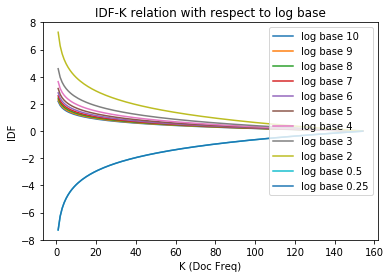

In [16]:
legnd = []
for i in range(0,9):
    invDocFreqDic={}
    for key,value in DocFreqDic.items():
        invDocFreqDic[key] = math.log((len(txtFiles) + 1)/value, 10-i)

    plt.plot(sorted(list(DocFreqDic.values()), reverse=True), sorted(list(invDocFreqDic.values())))
    legnd.append("log base " + str(10-i))

invDocFreqDic={}
for key,value in DocFreqDic.items():
    invDocFreqDic[key] = math.log((len(txtFiles) + 1)/value, 0.5)

plt.plot(sorted(list(DocFreqDic.values())), sorted(list(invDocFreqDic.values())))
legnd.append("log base " + str(0.5))

invDocFreqDic={}
for key,value in DocFreqDic.items():
    invDocFreqDic[key] = math.log((len(txtFiles) + 1)/value, 0.5)

plt.plot(sorted(list(DocFreqDic.values())), sorted(list(invDocFreqDic.values())))
legnd.append("log base " + str(0.25))

plt.title('IDF-K relation with respect to log base')
plt.xlabel('K (Doc Freq)')
plt.ylabel('IDF')
plt.legend(legnd, loc='upper right')    
plt.show

construct a plot Term Frequency weight transformation such as this one

<img src="files/images/TFNorm.png">

<function matplotlib.pyplot.show(*args, **kw)>

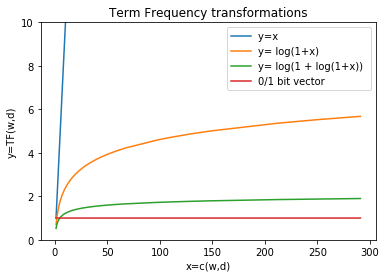

In [19]:
legnd = []
sList = wordList(open(txtFiles[0]).read())
sListWoPuncs = removePuncs(sList)
x_cwd = termFrequencyInDoc(sListWoPuncs)
plt.plot(sorted(list(x_cwd.values())), sorted(list(x_cwd.values())))
legnd.append("y=x ")

y_tfwd1 = {}
for key in x_cwd.keys():
    y_tfwd1[key] = math.log(1+x_cwd[key])
plt.plot(sorted(list(x_cwd.values())), sorted(list(y_tfwd1.values())))
legnd.append("y= log(1+x) ")

y_tfwd2 = {}
for key in x_cwd.keys():
    y_tfwd2[key] = math.log(1+math.log(1+x_cwd[key]))
plt.plot(sorted(list(x_cwd.values())), sorted(list(y_tfwd2.values())))
legnd.append("y= log(1 + log(1+x)) ")

y_tfwd3 = {}
for key in x_cwd.keys():
    y_tfwd3[key] = 1
plt.plot(sorted(list(x_cwd.values())), sorted(list(y_tfwd3.values())))
legnd.append("0/1 bit vector")


plt.title('Term Frequency transformations')
plt.xlabel('x=c(w,d)')
plt.ylabel('y=TF(w,d)')
plt.legend(legnd, loc='upper right')
plt.ylim(0, 10)
plt.show

#### construct plot of BM25 as shown here

<img src="files/images/BM25.png">

In [21]:
for key in x_cwd.keys():
    y_tfwd1[key] = math.log(1+x_cwd[key])
